In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [2]:
epochs=10
lr=1e-3
batch_size=64
img_dims=(96,96,3)
data=[]
labels=[]

In [3]:
image_files = [f for f in glob.glob(r'C:\Users\AGNETTA\OneDrive\Desktop\Lance_mtech notes\pattern recognition Machine learning\GenderDataset - Copy - Copy\Training' + "/**/*" ,recursive=True)if not os.path.isdir(f)]
random.shuffle(image_files)

In [4]:
for img in image_files:
    
    image = cv2.imread(img)
    
    image = cv2.resize(image,(img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)
    
    label = img.split(os.path.sep)[-2]
    if(label=="female"):
        label = 1
    else:
        label = 0
        
    labels.append([label])

In [5]:
data = np.array(data,dtype="float")/255
labels = np.array(labels)

In [6]:
(trainX,testX,trainY,testY) = train_test_split(data,labels,test_size=0.2,random_state=42)
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)


In [7]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [8]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
    
    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
        
    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model
    
    

In [9]:
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

In [10]:
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

C:\Users\AGNETTA\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)


C:\Users\AGNETTA\AppData\Local\Temp/ipykernel_26448/2376112173.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


Epoch 1/10
147/147 [==============================] - 215s 1s/step - loss: 0.5714 - accuracy: 0.7774 - val_loss: 1.6275 - val_accuracy: 0.4861
Epoch 2/10
147/147 [==============================] - 206s 1s/step - loss: 0.3662 - accuracy: 0.8555 - val_loss: 2.2393 - val_accuracy: 0.4869
Epoch 3/10
147/147 [==============================] - 201s 1s/step - loss: 0.2561 - accuracy: 0.9024 - val_loss: 0.4211 - val_accuracy: 0.8343
Epoch 4/10
147/147 [==============================] - 198s 1s/step - loss: 0.2339 - accuracy: 0.9126 - val_loss: 0.1954 - val_accuracy: 0.9260
Epoch 5/10
147/147 [==============================] - 194s 1s/step - loss: 0.2069 - accuracy: 0.9190 - val_loss: 0.3136 - val_accuracy: 0.8808
Epoch 6/10
147/147 [==============================] - 198s 1s/step - loss: 0.1816 - accuracy: 0.9290 - val_loss: 0.1999 - val_accuracy: 0.9256
Epoch 7/10
147/147 [==============================] - 200s 1s/step - loss: 0.1774 - accuracy: 0.9293 - val_loss: 0.1674 - val_accuracy: 0.9366

In [12]:
model.save('gender_detection.model')


INFO:tensorflow:Assets written to: gender_detection.model\assets


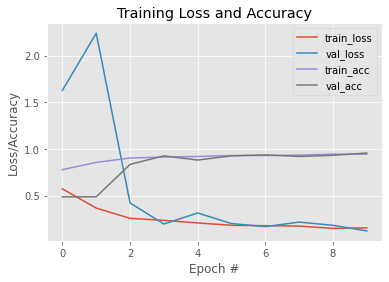

In [13]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')